In [1]:
"""
Initialization
"""
from yolov4_tiny_detector.detector import Detector

# load detector
detector = Detector()

# paths
weight_path = 'model_weights/PND-v1.03-E140-TL2.8661-VL4.9277.pth'

# initialize model, set device GPU:cuda or CPU:cpu
detector.init(weight_path, device='cuda')

Initializing model...
Set device to "cuda" successfully!
Loading weights into state dict...
Initializing YOLO bounding-box decoder...
Finished!


In [2]:
from glob import glob
import random
img_list = glob('../pnd_v1/image_data/*/*jpg')
idx = random.randint(0, len(img_list))

len(img_list), idx

(5261, 327)

In [3]:
"""
Detection
"""
from PIL import Image
import time

# set text font file path for drawing marks
detector.text_font = 'simhei.ttf' 

t0 = time.time()

# read image
img = Image.open(img_list[1634])

# detector and return bboxes
bboxes = detector.detect_image(img)
# you can also get bbox by
bboxes = detector.result

print(bboxes)
print('Execution Time: {} s'.format(time.time()-t0) )

[[2, '2', 0.73813653, [669.1631, 332.1644, 691.5104, 365.36996]], [3, '3', 0.60714793, [422.4839, 335.8617, 442.0359, 372.27713]], [5, '5', 0.6329801, [492.7697, 344.4499, 517.66156, 385.7323]], [5, '5', 0.5065221, [440.773, 336.3548, 463.44547, 371.5174]], [6, '6', 0.8604892, [902.2373, 328.9347, 925.20074, 370.22543]], [6, '6', 0.79944783, [234.70636, 325.39624, 252.90236, 365.03452]], [6, '6', 0.7938216, [849.1342, 349.35507, 876.74384, 386.22604]], [7, '7', 0.91662234, [595.2649, 330.70312, 625.3571, 368.32404]]]
Execution Time: 0.6684455871582031 s


### Object information:  
`[class no., class name, confidence, bounding box]`

### and in bounding box:  
`[x_min, y_min, x_max, y_max]`


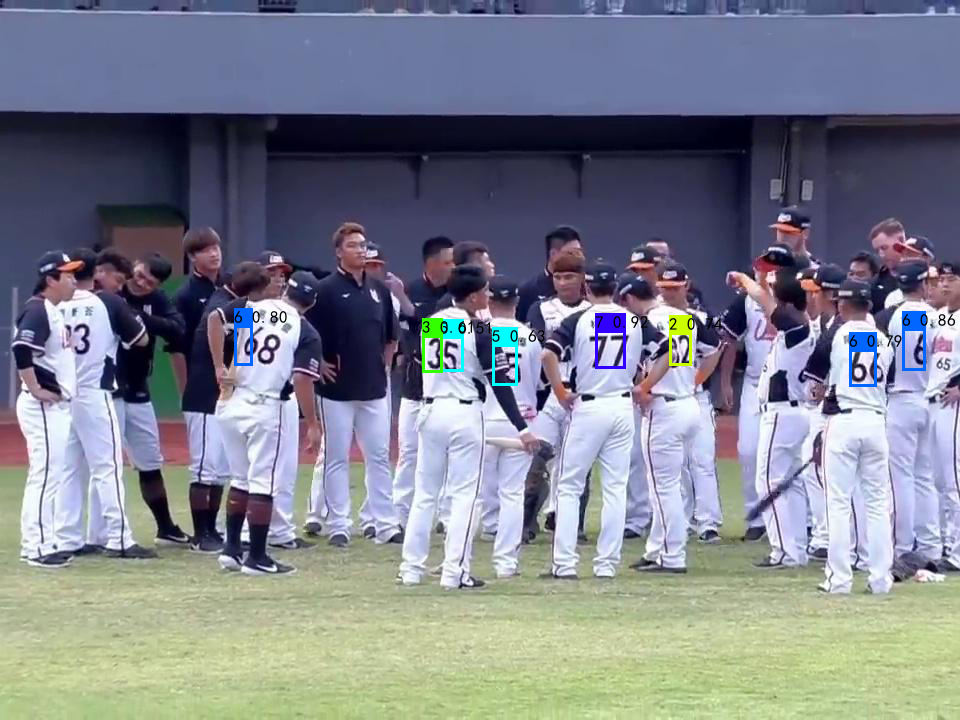

In [4]:
"""
Bounding Boxes
"""
marked_img = detector.mark_bboxes(show_text=True, line_thick=3,text_size=0.6)

marked_img 

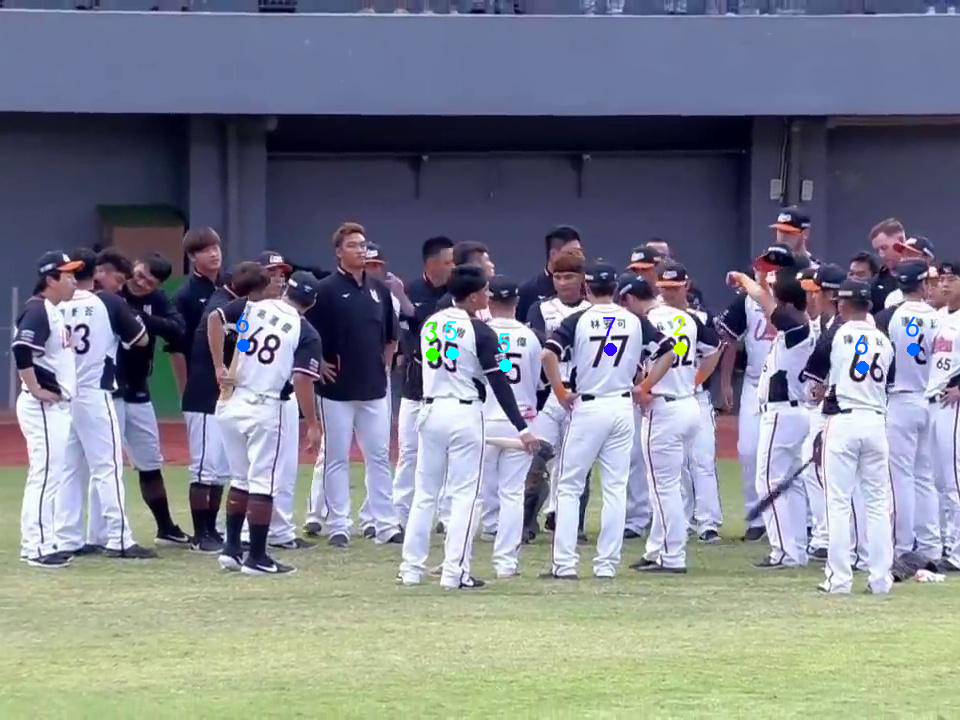

In [5]:
"""
Center Points
"""
marked_img = detector.mark_centers(show_text=True, point_size=6, text_size=1)

marked_img